### Importa as bibliotecas

In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.simplefilter("ignore")

##### Exibe a versão do Panda

In [8]:
pd.__version__

'1.3.4'

##### Carrega o Arquivo 

In [9]:
df = pd.read_excel('movimentacao-2022_ate_29_04.xlsx', sheet_name="Movimentação")

##### Exibe as linhas do arquivo

In [10]:
df.head()

,Entrada/Saída,Data,Movimentação,Produto,Instituição,Quantidade,Preço unitário,Valor da Operação
0,Debito,25/03/2022,Transferência - Liquidação,BEES3 - BANESTES S/A BANCO DO ESTADO DO...,CLEAR CORRETORA - GRUPO XP,60,5.02,301.38
1,Credito,25/03/2022,Transferência - Liquidação,BLAU3 - BLAU FARMACÊUTICA S.A.,CLEAR CORRETORA - GRUPO XP,10,28.39,283.90
2,Credito,24/03/2022,Transferência - Liquidação,CGAS5 - CIA DE GAS DE SAO PAULO - COMGAS,CLEAR CORRETORA - GRUPO XP,2,131.95,263.90
3,Debito,24/03/2022,Transferência - Liquidação,CSMG3 - COMPANHIA DE SANEAMENTO DE MINA...,CLEAR CORRETORA - GRUPO XP,10,14.40,144.00
4,Credito,24/03/2022,Transferência - Liquidação,ITSA4 - ITAUSA S/A,CLEAR CORRETORA - GRUPO XP,10,10.84,108.40


##### Exibe as Colunas do Arquivo

In [11]:
df.columns

Index(['Entrada/Saída', 'Data', 'Movimentação', 'Produto', 'Instituição',
       'Quantidade', 'Preço unitário', 'Valor da Operação'],
      dtype='object')

##### Exibe os tipos de cada coluna 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entrada/Saída      91 non-null     object 
 1   Data               91 non-null     object 
 2   Movimentação       91 non-null     object 
 3   Produto            91 non-null     object 
 4   Instituição        91 non-null     object 
 5   Quantidade         91 non-null     int64  
 6   Preço unitário     91 non-null     float64
 7   Valor da Operação  91 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 5.8+ KB


##### Trata os dados das colunas ('Preço unitário', 'Valor da Operação', 'Produto')

In [13]:
df['Preço unitário'] = df['Preço unitário'].apply(lambda x : str(x).replace("-", "0"))
df['Valor da Operação'] = df['Valor da Operação'].apply(lambda x : str(x).replace("-", "0"))
df["Produto"] = df["Produto"].str.split("-").str.get(0).str.strip()

##### Converte as colunas ('Preço unitário', 'Valor da Operação') para o float

In [14]:
df['Preço unitário'] =df['Preço unitário'].astype('float64')
df['Valor da Operação'] =df['Valor da Operação'].astype('float64')

##### Converte a coluna ('Data') para o tipo Date

In [15]:
df['Data'] = pd.to_datetime(df['Data'], infer_datetime_format=True)

##### Count

In [16]:
df.count()

Entrada/Saída        91
Data                 91
Movimentação         91
Produto              91
Instituição          91
Quantidade           91
Preço unitário       91
Valor da Operação    91
dtype: int64

##### Discribe

In [17]:
df.describe()

,Quantidade,Preço unitário,Valor da Operação
count,91.000000,91.000000,91.000000
mean,22.461538,17.696593,150.782308
std,52.466986,24.136973,208.406332
min,1.000000,0.010000,0.100000
25%,10.000000,0.915000,9.155000
50%,10.000000,6.350000,92.290000
75%,15.000000,26.740000,212.015000
max,360.000000,131.950000,1432.760000


##### Remove a coluna "Instituição" e exibe 

In [18]:
df.drop(['Instituição'], axis=1, inplace=True)

##### Agrupa por tipo de movimentação

In [19]:
df_sum_Movimentacao = df.groupby(["Movimentação"]).sum()  
df_sum_Movimentacao

,Quantidade,Preço unitário,Valor da Operação
Movimentação,,,
Dividendo,90,2.67,32.76
Juros Sobre Capital Próprio,422,0.14,27.73
Rendimento,304,9.20,115.49
Transferência - Liquidação,1228,1598.38,13545.21


##### Filtra as informações da coluna movimentações


In [20]:
types_incomes = ['Juros Sobre Capital Próprio','Rendimento', 'Dividendo']
df_income_only = df[df['Movimentação'].isin(types_incomes)]
print(df_income_only.sum());

Entrada/Saída        CreditoCreditoCreditoCreditoCreditoCreditoCred...
Movimentação         RendimentoDividendoJuros Sobre Capital Próprio...
Produto              WTSP11BWEGE3WEGE3WEGE3BCFF11BRCR11BTCR11MXRF11...
Quantidade                                                         816
Preço unitário                                                   12.01
Valor da Operação                                               175.98
dtype: object


## 

##### Exibir rendimentos agrupado por mês

In [21]:
show_columns = ['Data', 'Quantidade', 'Valor da Operação']
df_income_only.groupby([df['Data'].dt.year.rename('Ano'), df['Data'].dt.month.rename('Mes')])[show_columns].sum()  


Quantidade  Valor da Operação
Ano  Mes                               
2022 1            82              31.46
     2           495              87.27
     3           239              57.25

##### Exibe rendimentos agrupado por  Período e por Produto

In [22]:
df_grupby_produto_period = df_income_only.groupby([df['Data'].dt.year.rename('Ano'), df['Data'].dt.month.rename('Mes'), df['Produto']]).sum()  
df_grupby_produto_period.head(100)

Quantidade  Preço unitário  Valor da Operação
Ano  Mes Produto                                               
2022 1   BCFF11           12            0.54               6.51
         BRCR11            2            0.50               1.00
         BTCR11           20            0.91              18.27
         MXRF11           46            0.09               4.14
         SADI11            2            0.77               1.54
     2   BBSE3            20            0.93               9.27
         BCFF11           12            0.54               6.48
         BRCR11           11            0.50               5.50
         BTCR11           20            1.05              21.00
         CIEL3           352            0.09              26.11
         KLBN11           10            0.34               3.43
         LOGG3            10            0.87               8.66
         MXRF11           58            0.09               5.22
         SADI11            2            0.80               1.60
     3   BCFF11           12            0.54               6.48
         BRCR11           14            0.50               7.00
         BTCR11           21            1.10              23.10
         JHSF3            10            0.16               1.60
         MXRF11           58            0.09               5.22
         SADI11            2            0.85               1.70
         UGPA3            10            0.17               1.70
         WEGE3           110            0.26               9.82
         WTSP11B           2            0.32               0.63

##### Valor da operação Agrupapado por produto

In [23]:
df_by_product = df_income_only.groupby([df['Produto']])['Produto','Valor da Operação'].sum()
df_by_product

,Valor da Operação
Produto,
BBSE3,9.27
BCFF11,19.47
BRCR11,13.50
BTCR11,62.37
CIEL3,26.11
JHSF3,1.60
KLBN11,3.43
LOGG3,8.66
MXRF11,14.58


##### Gráfico - Rendimentos Agrupapado por produto

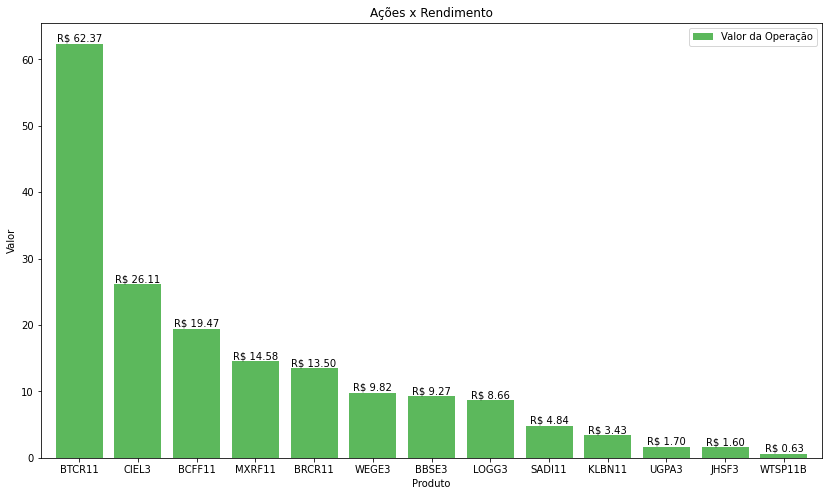

In [24]:
df_by_product = df_by_product.sort_values(['Valor da Operação'], ascending=False)

colors = ['#5cb85c', '#5bc0de', '#d9534f']
p1 = df_by_product.plot(kind='bar', color=colors, figsize=(14, 8), rot=0, width=0.8, ylabel='Valor', title="Ações x Rendimento")

for p in p1.containers:
    p1.bar_label(p, fmt='R$ %.2f', label_type='edge')


##### Dividendos Mensais

In [25]:
df_by_products_monthly_income = df_income_only.groupby([df_income_only['Produto'], df_income_only['Data'].dt.strftime('%m/%Y') ],  as_index=True)['Valor da Operação'].sum()  
# df_by_products_monthly_income = df_income_only.groupby([df_income_only['Data'].dt.month.rename('ju'), df_income_only['Produto']],  as_index=True)['Preço unitário'].sum()  

df_by_products_monthly_income
# print(df_by_products_monthly_income)
# df_income_only.info()

# df_by_products_monthly_income[df_by_products_monthly_income['Produto'].isin(['BCFF11'])]



# print(df_by_products_monthly_income.loc[(df_by_products_monthly_income.index.get_loc ) ])
# # df_by_products_monthly_income.loc['BCFF11']:

# df_by_products_monthly_income.plot(kind='bar', color=colors, figsize=(14, 8), rot=0, width=0.8, ylabel='Valor', title="Ações x Rendimento")

Produto  Data   
BBSE3    02/2022     9.27
BCFF11   01/2022     6.51
         02/2022     6.48
         03/2022     6.48
BRCR11   01/2022     1.00
         02/2022     5.50
         03/2022     7.00
BTCR11   01/2022    18.27
         02/2022    21.00
         03/2022    23.10
CIEL3    02/2022    26.11
JHSF3    03/2022     1.60
KLBN11   02/2022     3.43
LOGG3    02/2022     8.66
MXRF11   01/2022     4.14
         02/2022     5.22
         03/2022     5.22
SADI11   01/2022     1.54
         02/2022     1.60
         03/2022     1.70
UGPA3    03/2022     1.70
WEGE3    03/2022     9.82
WTSP11B  03/2022     0.63
Name: Valor da Operação, dtype: float64

##### Exemplo de Gráfico com Multiplas Colunas

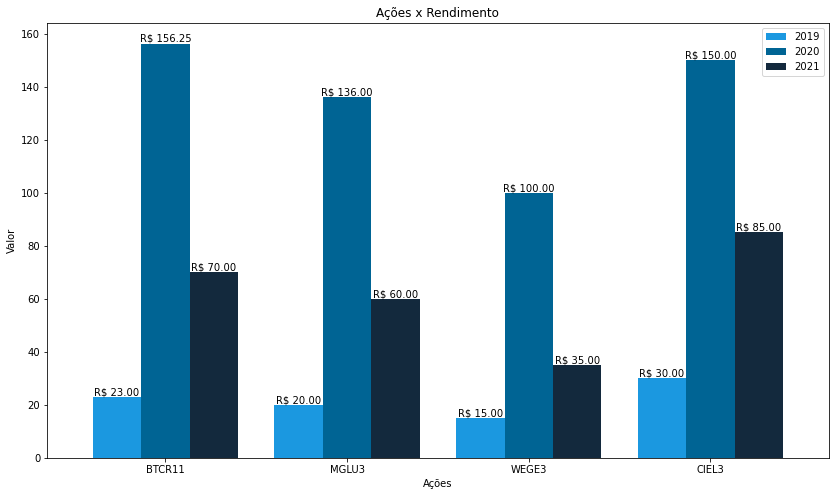

In [26]:
data=[["BTCR11",23.00,156.25,70.00],
      ["MGLU3",20,136,60],
      ["WEGE3",15,100,35],
      ["CIEL3",30,150,85]
     ]

colors = ['#1B98E0', '#006494', '#13293D']

df=pd.DataFrame(data,columns=["Ações","2019", "2020", "2021"])
p2 = df.plot(x="Ações",  kind='bar', color=colors, figsize=(14, 8), rot=0, width=0.8,  ylabel='Valor', title="Ações x Rendimento")

for p in p2.containers:
    p2.bar_label(p, fmt='R$ %.2f', label_type='edge')


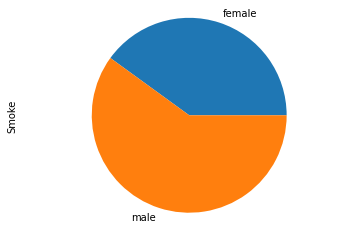

<AxesSubplot:ylabel='total_arrests'>

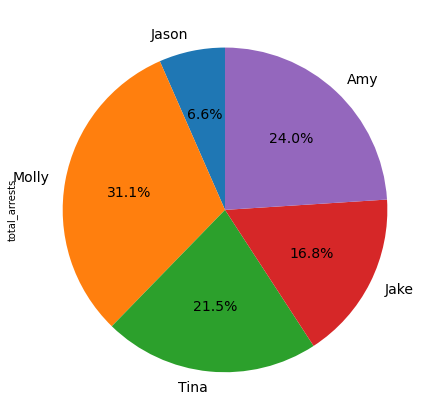

In [27]:
df = pd.DataFrame({'Sex': ['female', 'male', 'female'], 'Smoke': [1, 3, 1]})

df.Smoke.groupby(df.Sex).sum().plot(kind='pie')
plt.axis('equal')
plt.show()





# sample data
raw_data = {'officer_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'jan_arrests': [4, 24, 31, 2, 3],
        'feb_arrests': [25, 94, 57, 62, 70],
        'march_arrests': [5, 43, 23, 23, 51]}
df = pd.DataFrame(raw_data, columns = ['officer_name', 'jan_arrests', 'feb_arrests', 'march_arrests'])
df['total_arrests'] = df['jan_arrests'] + df['feb_arrests'] + df['march_arrests']

plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'total_arrests', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['officer_name'], legend = False, fontsize=14)


